# Feature Imporatnce Analysis

In [11]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configparser
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from src.utils import utils
from src.modelling import training as train
from src.modelling import models, training



%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read data

In [12]:
proj_root = utils.get_proj_root()
config = configparser.ConfigParser(interpolation=None)
config.read(proj_root.joinpath('config/data_config.ini'))

final_year = int(config['year_limits']['end_year'])
training_data_rel_path = config['data_paths']['preprocessed_data_path']

training_data_path =  proj_root.joinpath(training_data_rel_path)
training_data_subset_path  = proj_root.joinpath(config['data_paths']['training_subset_path'])
testing_data_subset_path  = proj_root.joinpath(config['data_paths']['testing_subset_path'])



# model_output_path = proj_root.joinpath(config['modelling_paths']['logistic_regression_model_path'])

In [13]:

train_data =  pd.read_csv(training_data_subset_path)
test_data = pd.read_csv(testing_data_subset_path)
train_data.head()

,year,industry,symbol,currentRatio,currentRatio_percentage_change,quickRatio,quickRatio_percentage_change,daysOfSalesOutstanding,daysOfSalesOutstanding_percentage_change,daysOfInventoryOutstanding,...,priceEarningsToGrowthRatio_percentage_change,dividendYield,dividendYield_percentage_change,enterpriseValueMultiple,enterpriseValueMultiple_percentage_change,interestRate,interestRate_percentage_change,adjDividend,dps_growth,dps_change_next_year
0,2012,24,291,2.198387,-2.275946,1.385806,-0.090461,49.567449,3.987852,89.289449,...,6.939145,0.025377,-5.500411,8.692139,5.900833,0.14,40.000000,2.36,7.272727,0
1,2013,24,291,1.698186,-22.753086,1.012270,-26.954450,50.284895,1.447414,87.567366,...,21.913077,0.018089,-28.717392,12.326051,41.806877,0.11,-21.428571,2.54,7.627119,0
2,2014,24,291,1.961487,15.504836,1.127209,11.354593,48.611609,-3.327613,82.245394,...,-39.851336,0.020773,14.836058,13.065263,5.997151,0.09,-18.181818,3.42,34.645669,0
3,2015,24,291,1.543411,-21.314241,0.852768,-24.346986,50.082909,3.026645,83.473315,...,799.567847,0.027175,30.819267,12.318266,-5.717433,0.13,44.444444,4.10,19.883041,0
4,2016,24,291,1.885512,22.165260,1.136839,33.311664,53.242552,6.308824,82.149269,...,-84.149916,0.024801,-8.738086,13.479738,9.428861,0.40,207.692308,4.44,8.292683,0


In [14]:
test_data.head()

,year,industry,symbol,currentRatio,currentRatio_percentage_change,quickRatio,quickRatio_percentage_change,daysOfSalesOutstanding,daysOfSalesOutstanding_percentage_change,daysOfInventoryOutstanding,...,priceEarningsToGrowthRatio_percentage_change,dividendYield,dividendYield_percentage_change,enterpriseValueMultiple,enterpriseValueMultiple_percentage_change,interestRate,interestRate_percentage_change,adjDividend,dps_growth,dps_change_next_year
0,2021,24,291,1.704815,-9.559027,1.043165,-14.902195,48.109178,-9.839675,96.808992,...,67.702091,0.033253,-0.909598,15.729376,-12.979421,0.08,-78.947368,5.92,0.680272,0
1,2021,96,36,1.566500,-14.191051,1.131391,-21.328131,65.431631,-11.277742,73.344031,...,-112.480300,0.012391,-30.862468,19.078414,21.967224,0.08,-78.947368,1.06,8.163265,0
2,2021,63,4,1.849599,7.740228,1.277070,12.122625,54.968195,-18.741994,101.543130,...,-69.722616,0.012897,-2.300018,23.954222,-12.035499,0.08,-78.947368,1.80,25.000000,0
3,2021,31,3,0.793544,-5.912486,0.562795,-6.766883,64.800701,-7.822868,65.443082,...,-118.942510,0.038643,-10.545641,11.593723,-68.566197,0.08,-78.947368,5.20,10.169492,0
4,2021,49,6,1.251937,-10.687424,1.139527,-11.782243,70.266362,8.749094,0.000000,...,-45.271038,0.010467,-21.579906,21.516834,24.968678,0.08,-78.947368,3.61,10.060976,0


In [15]:
label_col_name = 'dps_change_next_year'
optimal_features  = utils.load_value(proj_root.joinpath(config['modelling_paths']['optimal_features']))
X_train, y_train = train.split_Xy(train_data, label_col_name=label_col_name)
X_train = X_train[optimal_features]

X_test, y_test = train.split_Xy(test_data, label_col_name=label_col_name)
X_test = X_test[optimal_features]

# modelling

In [16]:
list(config['modelling_paths'].keys())

['feature_importance',
 'model_performance_with_feature_drop',
 'optimal_features',
 'model_output']

In [17]:
config._sections['API']

{'fmp_base_url': 'https://financialmodelingprep.com/api/v3',
 'fred_base_url': 'https://api.stlouisfed.org/fred/series/observations?series_id=FEDFUNDS&'}

In [18]:
import logging
from src.data_processing import augmentation as aug
logger = logging.getLogger(__name__)
proj_root = utils.get_proj_root()

config = configparser.ConfigParser(interpolation=None)
config.read(proj_root.joinpath('config/data_config.ini'))

final_year = int(config['year_limits']['end_year'])
training_data_rel_path = config['data_paths']['preprocessed_data_path']



training_data_path =  proj_root.joinpath(training_data_rel_path)
training_data_subset_path  = proj_root.joinpath(config['data_paths']['training_subset_path'])
testing_data_subset_path  = proj_root.joinpath(config['data_paths']['testing_subset_path'])
feature_set_path = proj_root.joinpath(config['modelling_paths']['optimal_features'])
model_output_dir = proj_root.joinpath(config['modelling_paths']['model_output'])


label_col_name = 'dps_change_next_year'
optimal_features = train.get_features(feature_set_path)

# MODEL_LIST = ['logistic_regression']
##=====================
model_name =  'logistic_regression'
model_name = 'random_forest'
tune_trials = 1

def get_model_class(model_name:str):
    if model_name == 'logistic_regression':
        model = models.LogisticWrapper
    elif model_name == 'random_forest':
        model = models.RandomForestWrapper

    return model

model_params = config._sections[model_name]
print(model_params)
model_class = get_model_class(model_name=model_name)
model = model_class(**model_params)

# get data
training_data = train.get_training_data(file_path=training_data_path)

# split dataset
training_data_subset, testing_data_subset = train.train_test_split(df=training_data, final_year=final_year)

training_data_subset_resampled = aug.balance_data(training_data_subset, label_col_name=label_col_name)

training_data_subset = training_data_subset_resampled[optimal_features+[label_col_name]]
testing_data_subset = testing_data_subset[optimal_features+[label_col_name]]


X_train, y_train = train.split_Xy(training_data_subset, label_col_name=label_col_name)

model_output_path = model_output_dir.joinpath(model_name+'.pkl')
print(model_output_path)
# trainer = training.ModelTrainer(model_class=model, X=X_train, y=y_train,
#                                 training_data_path=training_data_subset_path,
#                                 model_output_path=model_output_path)
trainer = training.ModelTrainer(model_class=model,
                                training_data=training_data_subset,
                                testing_data=testing_data_subset,
                                label_col_name=label_col_name,
                                model_output_path=model_output_path)

trainer.tune_model(n_trials=tune_trials)
model = trainer.train_model(save_model=True)

[I 2024-01-02 17:06:17,673] A new study created in memory with name: no-name-2afd0dc5-6be8-4fac-886e-1ae2ff3d4791


{'n_jobs': '-1'}
/home/aroge/projects/dividend-cut-predictor/models/random_forest.pkl


[I 2024-01-02 17:06:20,748] Trial 0 finished with value: 0.9784424336530257 and parameters: {'n_estimators': 88, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9784424336530257.


Trial 0, n_estimators: 88, max_depth: 45, min_samples_split: 2, min_samples_leaf: 7, ROC-AUC: 0.9784424336530257
best score is: 0.9784424336530257
<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [22]:
test_predicted_values = model.predict(testing_data_subset.drop(labels=label_col_name, axis=1))

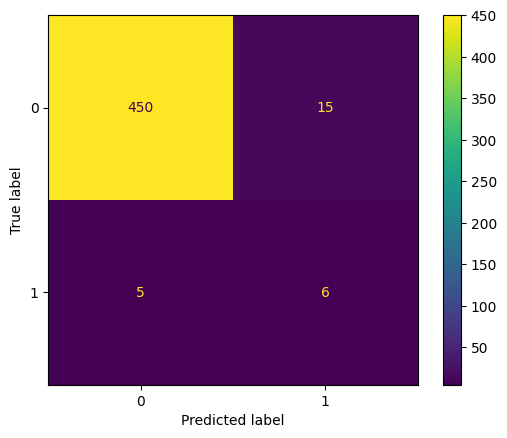

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_true=testing_data_subset[label_col_name],
                      y_pred=test_predicted_values)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## model evaluation